# Experiment Analysis - Jupyter Notebook

## Handeln

#### Intro

The first few weeks of the seminar are used to get into the idea of motor control. A good way to learn is also to experience the stimuli and action in the field of human perception and action. Therefore, the first weeks are focussed on doing a simple pointing task in different conditions, very losely based on Fitts' paper from the 1950's.

Fitts, P.M. (1954). The Information Capacity of the Human Motor System in Controlling the Amplitude of Movement. Journal of Experimental Psychology, 47(6), 381-391.

Fitts' observed that moving horizontally between two targets depended on the width of the targets and the distance between them. Fitts only looked at one-dimensional movements. In the experiment for the Handeln course we will explore how 2D-movements might depend on such parameters as e.g. target shape or cursor shape. More particularly we will investigate if the movements will remain straight movements to the centre of the target or not. For this we will need to analyse the trajectories of the movements depending on target and or cursor shape and any other parameters of interest in the experiment.

#### Requirements before starting to work in this notebook

In this notebook we will be looking at the analysis of movement data. **Before starting to work on this notebook you should have:** 
- installed the required conda environment
- run the little experiment on yourself (best using a graphics tablet or computer mouse, but failing that a track pad), as you will be working on your own data.

Do let us know if you have trouble running the experiment. We can then have a look at why this might be so (sometimes different systems respond differently to the same code), and in the worst case we can provide you with a default dataset to work on.

#### About the data

The data for the experiment should be stored in a folder called `data`. In this notebook we will be taking a look at the data and investigate whether the different conditions led to different movement trajectories.

Note: It is important to realise that using a computer mouse in the experiment has its caveats. For instance how much a cursor moves across a computer screen does not depend in a one-to-one fashion on how far the mouse is moved in physical space, but also on the speed with which the physical mouse is moved. You can try this out for yourself:  
- mark a begin and end point of your movement in physical space (e.g. put 2 pieces of tape on your desk).
- make sure that the cursor has enough space on the screen to move (e.g. if you are planning to move from left to right, place the cursor on the left end of the screen).
- then move slowly from the beginning marker to the end marker in physical phase and check how much the cursor moved on the screen (this will be a relatively small amount).
- repeat the above two steps but now make a fast movement from beginning to end marker, and again check the distance traveled by the cursor on the screen (this should now have moved to a much larger extent).  

Knowing this it should be evident that in the literature, when it comes to the study of visuomotor control, it is hardly ever the case that computer mouses are used in the experimental task. At the very least this is something to be aware of when planning actual experiments. For the purpose of this course we will however be largely ignoring this, but just so you know that some of the results, particularly for this demo experiment, might have to be taken with a grain of salt.

### Imports
We'll start by loading the most useful packages:
- Numpy: for processing the data (see [here](https://numpy.org/doc/stable/reference/index.html) for documentation / more information)
- Pandas: to read in the data for a given trial (see [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html) for documentation / more information)
- Matplotlib: to make some plots (see [here](https://matplotlib.org/) for documentation / more information)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as ptch
import os # for interacting with the operating system (get file names etc)
# and then a helper file of our own with some useful
from Analysis_helper_functions import *

## We will start with reading in a single data file

If you have read the readme document that comes with the experiment you will have seen that the data-files consists of two parts:
- one very short part with its own header specifying the condition for that trial
- a second longer part with its own header where the information about the movement trajectory for that trial was stored.

The code below reads in both parts for a single trial.

In [7]:
# -----------------------------------------------------------
# Specify the dataset and trial to read in.
# -----------------------------------------------------------

participant_ID = 'max' # note this should be the name you have entered in the pop-up window when you ran the experiment
trialnr = 0

# -----------------------------------------------------------
# below some code for reading in the data for a single trial
# -----------------------------------------------------------

# directory in which the data for this participant is stored
datadir = '../Experiment_Code/Data/' + str(participant_ID) + '/' # note this may be stored in a different folder on your computer. Adjust if necessary.

# let's start with reading in the trial specified above
filename = 'participant_' + str(participant_ID) + '_trial_' + str(trialnr) + '_trajectory.csv'

# get first part of the trial to read in the trial conditions
trialcon = pd.read_csv(os.path.join(datadir+filename), nrows = 1)

# we will first read in the whole trajectory. For this part the header index is 2 and everything below it is the data
# we can read it in such that it takes just that part.
data = pd.read_csv(os.path.join(datadir+filename), header = 2)
# already add the velocity information straight away for extra convenience with plotting.
# how the velocity is calculated can be found in our helper function file Analysis_helper_functions
velo = velocity(data,['cursor_x','cursor_y'],'time')
data['vx'] = velo[:,1]
data['vy'] = velo[:,2]
data['vabs'] = velo[:,3]

# ----------------------------------------------
# print the trial conditions for an overview
# ----------------------------------------------
print('------- trial conditions ------------\n')
print(f"target location: \t ({trialcon.loc[0,'target_X']}, {trialcon.loc[0,'target_Y']})")
print(f"cursor size: \t\t ({trialcon.loc[0,'cursor_SX']}, {trialcon.loc[0,'cursor_SY']})")
print(f"starting point location: ({trialcon.loc[0,'start_X']}, {trialcon.loc[0,'start_Y']})")
print(f"shift: ({trialcon.loc[0,'cursor_shift']})")



------- trial conditions ------------

target location: 	 (0, 240)
cursor size: 		 (200, 50)
starting point location: (0, -240)
shift: (240)


/opt/anaconda3/envs/handeln2025/lib/python3.10/site-packages/matplotlib/patches.py:1648: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  center = (self.convert_xunits(self._center[0]),
/opt/anaconda3/envs/handeln2025/lib/python3.10/site-packages/matplotlib/patches.py:1649: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.convert_yunits(self._center[1]))


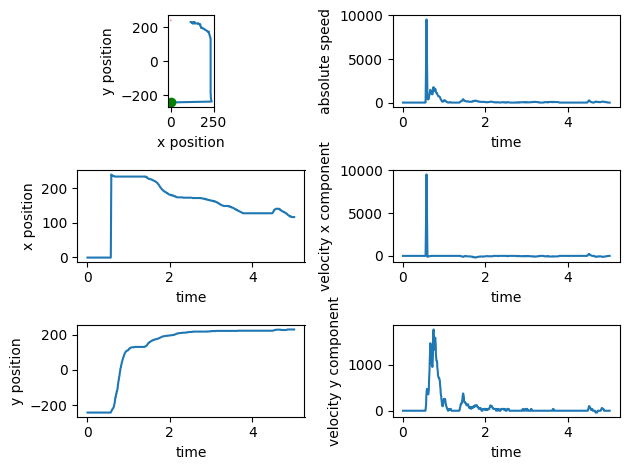

In [8]:
# plot the trajectory for this trial

fig, axs = plt.subplots(3,2)
#plot x-y trajectory
axs[0,0].plot(data['cursor_x'],data['cursor_y'])
axs[0,0].set_xlabel('x position')
axs[0,0].set_ylabel('y position')
axs[0,0].plot(trialcon.loc[0,'start_X'],trialcon.loc[0,'start_Y'],'go')
targetShape=ptch.Ellipse( trialcon.loc[0,['target_X','target_Y']],trialcon.loc[0,'target_SX'],trialcon.loc[0,'target_SY'], alpha=0.5,facecolor="red")
axs[0,0].add_patch(targetShape)
axs[0,0].set_aspect(1.0)
# plot x versus time
axs[1,0].plot(data['time'],data['cursor_x'])
axs[1,0].set_xlabel('time')
axs[1,0].set_ylabel('x position')
# plot y versus time
axs[2,0].plot(data['time'],data['cursor_y'])
axs[2,0].set_xlabel('time')
axs[2,0].set_ylabel('y position')

# -----------------------
# plot velocity/speed
# -----------------------

axs[0,1].plot(data['time'],data['vabs'])
axs[0,1].set_xlabel('time')
axs[0,1].set_ylabel('absolute speed')
# plot x versus time
axs[1,1].plot(data['time'],data['vx'])
axs[1,1].set_xlabel('time')
axs[1,1].set_ylabel('velocity x component')
# plot y versus time
axs[2,1].plot(data['time'],data['vy'])
axs[2,1].set_xlabel('time')
axs[2,1].set_ylabel('velocity y component')

fig.tight_layout()

There are already a few things that you might want to have a look at in these profiles:
- Is the movement a straight line? (look at the top-left figure)
    - If not straight in which direction is it veering off?
    - Can you think of a reason that it might veer in that direction?
    - Compare with other trials. Is there any pattern you notice?
=> Zuerst herausfinden wo ungefähr der Center des Cursors ist und anschließend zum Target ziehen

- From the absolute speed profile does this look like one smooth movement, or may there have been some sub-movements in this?
    - Can you think of ways that you might be able to tell one from the other?
=> Korrigieren findet statt

- Comparing x and y components: do they start at the same time? (see also the first question)
=> Ja, ein paar Anpassungen auf der Y-Achse